In [1]:
import healpy as hp 
import sys
import os
import numpy as np
sys.path.append('../')
import matplotlib.pyplot as plt
import camb
from tqdm import tqdm

In [4]:
%load_ext autoreload
%autoreload 2
from taunet.database import SpectrumDB
from taunet.simulation import CMBspectra

In [5]:
db = SpectrumDB()

In [6]:
TAUS = db.get_all_taus()

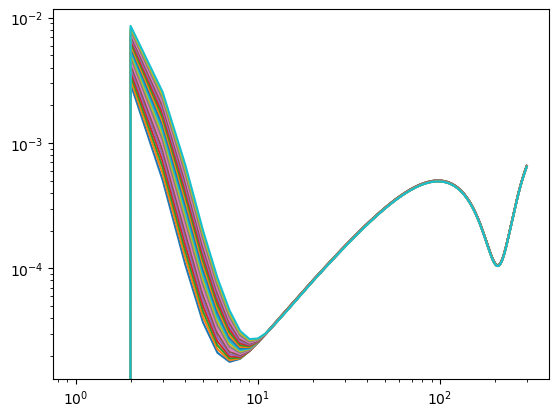

In [7]:
for tau in TAUS[:20]:
    cmb = CMBspectra(tau=float(tau))
    plt.loglog(cmb.ell, cmb.EE)

In [3]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.32, ombh2=0.02237, omch2=0.1201, mnu=0.06, tau=0.06)
pars.InitPower.set_params(ns=0.9651, r=0)
pars.set_for_lmax(284, lens_potential_accuracy=0)
results = camb.get_results(pars)
powers = results.get_lensed_scalar_cls(CMB_unit="muK", raw_cl=True)

In [19]:
db = SpectrumDB()

In [20]:
db.remove_table()

In [11]:
db.check_tau_exist(0.06)

False

In [15]:
db.insert_spectra(0.06, powers)

Spectra with tau 0.06 already exists.


In [13]:
db.check_tau_exist(0.06)

True

In [14]:
db.get_spectra(0.06)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01948220e+03, 3.42255847e-02, 1.40449001e-06, 2.75262707e+00],
       ...,
       [2.73120618e-01, 5.79613750e-04, 1.16692774e-06, 7.83039740e-03],
       [2.69061927e-01, 5.87305451e-04, 1.16644239e-06, 7.80511811e-03],
       [2.65044885e-01, 5.94950024e-04, 1.16547752e-06, 7.77759836e-03]])